## Assignment 1 - Classification


## Learning Outcomes


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. We will be using the better of 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.


In [11]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


**Questions (12 marks total)**

Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration:  ( 3 marks) 

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
    
2. Data Preprocessing: (4 marks)

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

3. Classification: (5 marks)

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



# 1. Data exploration

In [4]:
# Load the data
df = pd.read_excel("../data/assignment/default of credit card clients.xls", sheet_name=0, skiprows=1, header=0)
# Number of rows and columns
df.shape

(30000, 25)

In [5]:
# Display the first few rows of the dataset containing the column names
df.head(0)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [16]:
# List of columns with data types
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [25]:
dep_var = ['default payment next month']

discrete_vars = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
discrete_vars_bill = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
discrete_vars_pay = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [8]:
# Display the sample of the dataset
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
25665,25666,40000,2,2,2,26,-1,0,0,0,...,0,44024,18697,1300,1000,0,22373,680,10000,0
16464,16465,80000,2,3,1,59,0,0,0,0,...,50875,50372,49470,3212,2106,2000,1603,1903,2006,0
22386,22387,170000,2,1,2,30,2,2,2,2,...,157577,168094,170922,6800,6500,0,13000,5500,1000,1
10149,10150,200000,2,2,1,41,-2,-2,-2,-2,...,0,0,0,742,0,0,0,0,0,1
8729,8730,50000,1,2,1,43,0,0,0,0,...,9225,9417,9617,1140,1150,331,341,356,330,0


In [9]:
# Display the summary statistics of the dataset
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Analyze missing data

In [ ]:
# Check for missing values in the dataset
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [17]:
# Check for columns containing 0 values
(df == 0).sum()[df.eq(0).sum() > 0]

EDUCATION                        14
MARRIAGE                         54
PAY_0                         14737
PAY_2                         15730
PAY_3                         15764
PAY_4                         16455
PAY_5                         16947
PAY_6                         16286
BILL_AMT1                      2008
BILL_AMT2                      2506
BILL_AMT3                      2870
BILL_AMT4                      3195
BILL_AMT5                      3506
BILL_AMT6                      4020
PAY_AMT1                       5249
PAY_AMT2                       5396
PAY_AMT3                       5968
PAY_AMT4                       6408
PAY_AMT5                       6703
PAY_AMT6                       7173
default payment next month    23364
dtype: int64

In [ ]:
# Number of rows where there is no payment data (i.e., all PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 are 0)

(df[discrete_vars_pay] == 0).sum(axis=1).eq(len(discrete_vars_pay)).sum()

np.int64(9821)

In [22]:
# Number of rows where there is no bill amount data (i.e., all BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 are 0)
(df[discrete_vars_bill] == 0).sum(axis=1).eq(len(discrete_vars_bill)).sum()

np.int64(866)

We can ignore these 9821 and 866 records where there is neither bill nor payment made, they may not be useful for the classification

In [29]:
# Remove the rows where there is no payment data (i.e., all PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 are 0)
df = df[~(df[discrete_vars_pay] == 0).sum(axis=1).eq(len(discrete_vars_pay))]
# Remove the rows where there is no bill amount data (i.e., all BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 are 0)
df = df[~(df[discrete_vars_bill] == 0).sum(axis=1).eq(len(discrete_vars_bill))]

## Plotting

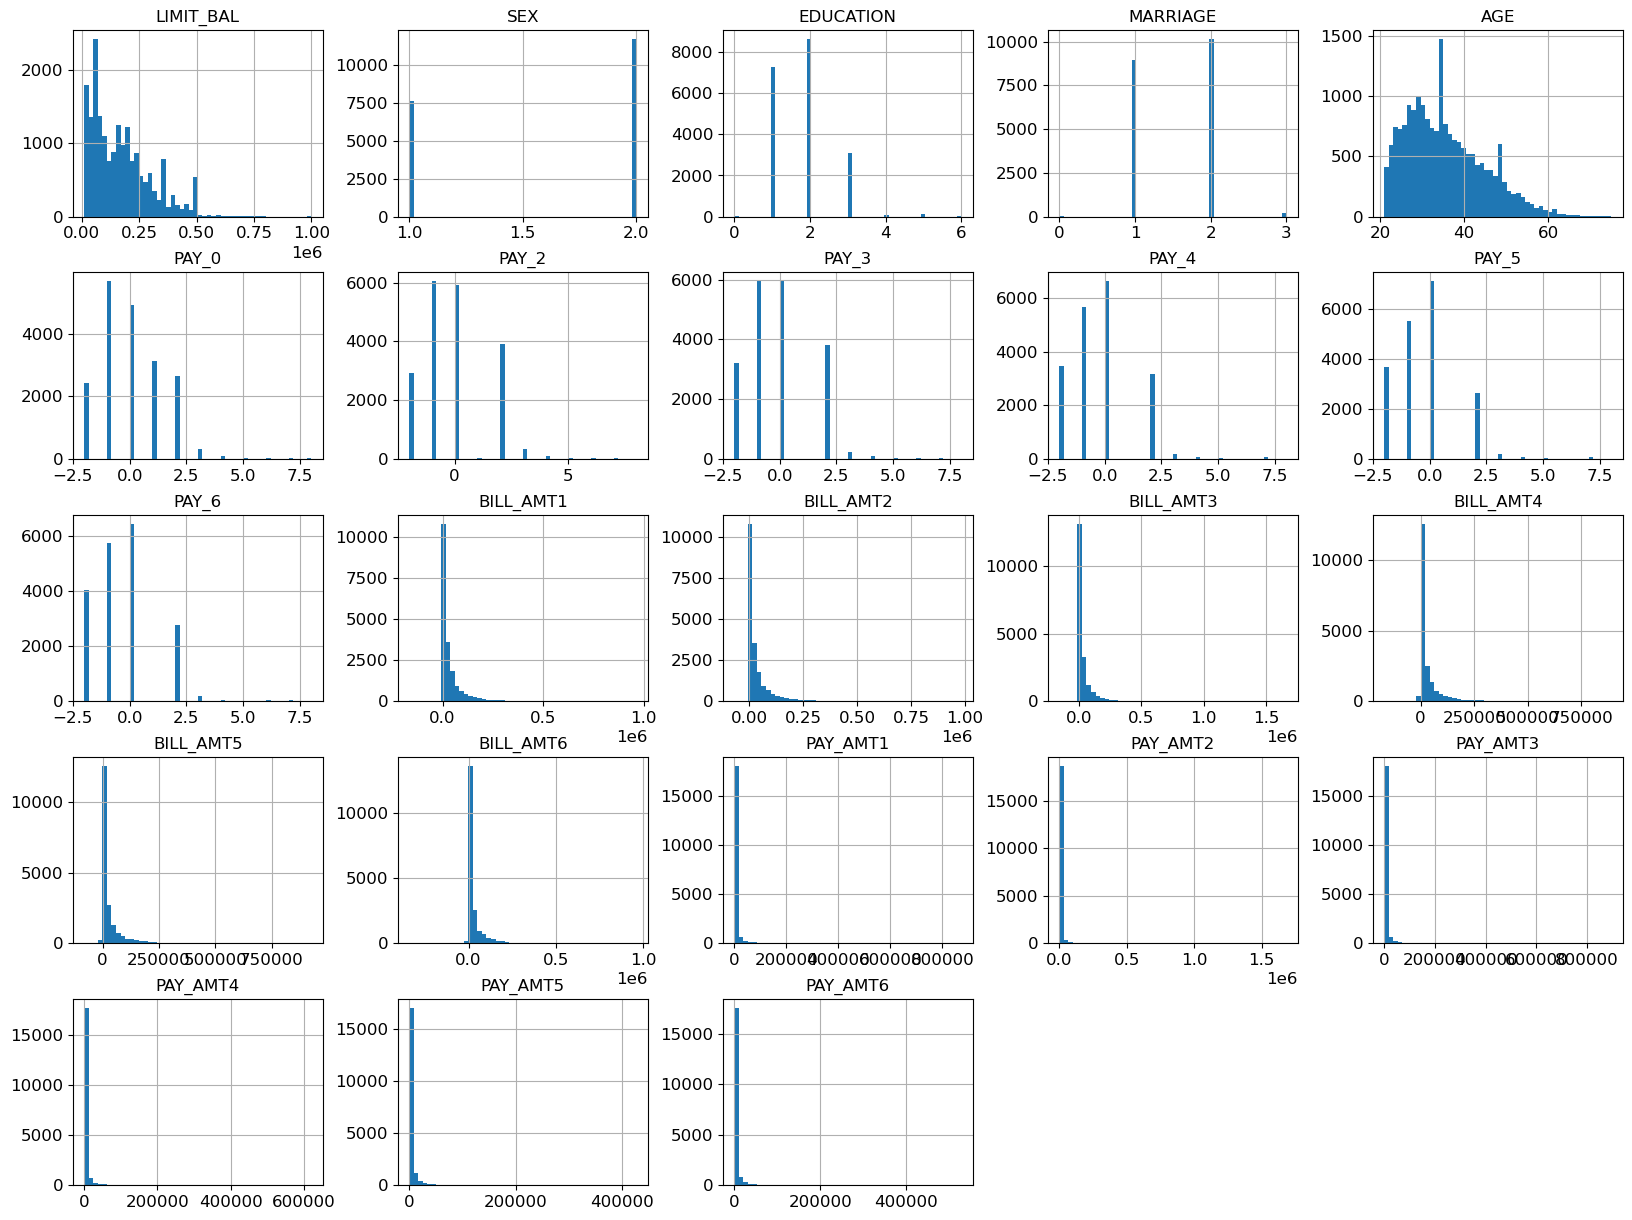

In [30]:
df.loc[:,discrete_vars].hist(bins=50, figsize=(20,15))
plt.show()

## Correlation Analysis

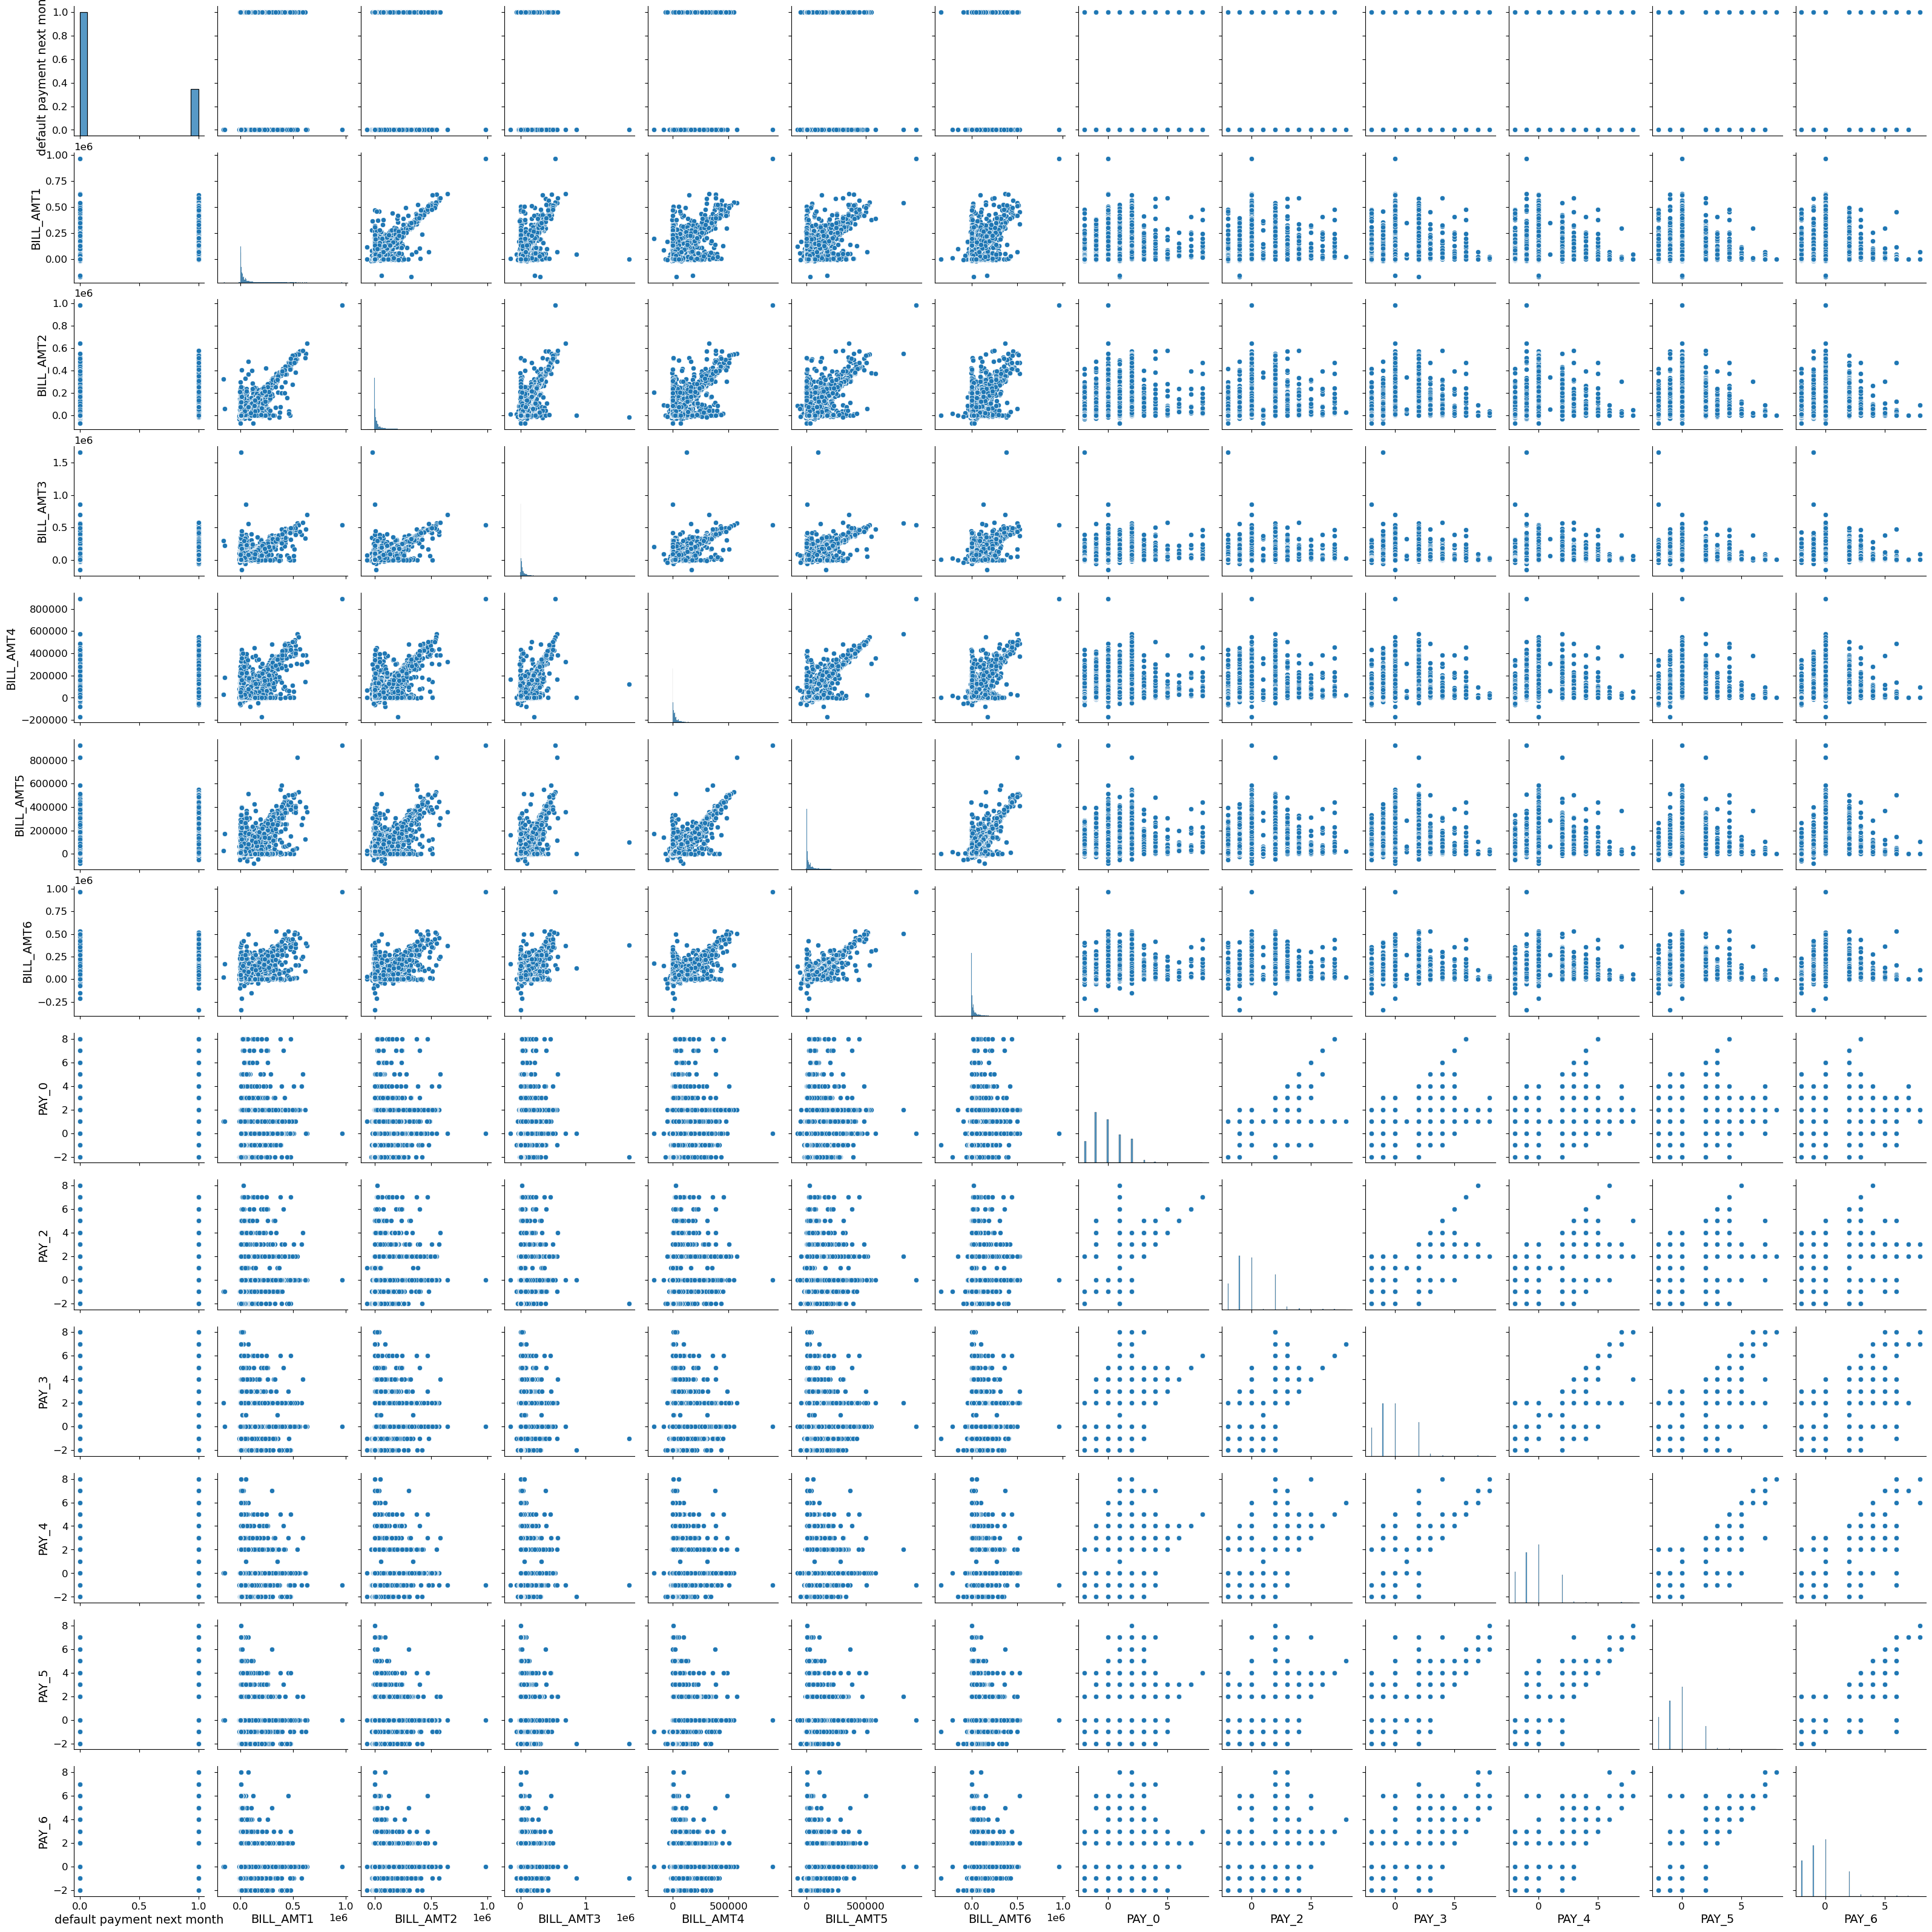

In [32]:
sns.pairplot(data=df.loc[:, dep_var + discrete_vars_bill + discrete_vars_pay])
plt.show()

#### Conclusions 
(3 marks)

Explain your results and choices